In [100]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [4]:
def compute_pos(xticks, width, i, models):
    index = np.arange(len(xticks))
    n = len(models)
    correction = i-0.5*(n-1)
    return index + width*correction

def present_height(ax, bar):
    for rect in bar:
        height = rect.get_height()
        posx = rect.get_x()+rect.get_width()*0.5
        posy = height*1.01
        ax.text(posx, posy, '%.4f' % height, rotation=90, 
                ha='center', va='bottom', fontsize=18, zorder=3)

In [58]:
def plot(xticks, data, ylim=None, figsize=(35, 12), bol=True):
    fig, axs = plt.subplots(1,3,figsize=figsize,dpi=300)
    # colors = ['#375CAA', '#FBB26B', '#C7CCDB', '#66A5C9', '#8A6AAB', #F16745]
    if bol == True:
        colors = ['#C7CCDB', '#FBB26B', '#FBB26B', '#66A5C9', '#8A6AAB']
        start_lim = [0.99, 0.97, 0.96]
        width = 0.25
    else:
        colors = ['#375CAA', '#C7CCDB', '#FBB26B', '#66A5C9', '#8A6AAB']
        start_lim = [0.99, 0.85, 0.95]
        width = 0.2
    
    for idx in range(3):
        for i, model in enumerate(data[idx].keys()):
            pos = compute_pos(xticks, width, i, data[idx].keys())
            bar = axs[idx].bar(pos, data[idx][model], width=width*0.95, label=model, color=colors[i])
            # present_height(ax, bar)
        
        axs[idx].set_xticks(np.arange(len(xticks)))
        axs[idx].set_xticklabels(xticks, fontsize=20)	

        if not ylim is None:
            axs[idx].set_ylim(start_lim[idx], ylim[idx])
        axs[idx].set_ylabel('', fontsize=30)
        axs[idx].legend(loc='lower right', shadow=True, ncol=1, fontsize=30)
        axs[idx].set_axisbelow(True)
        axs[idx].yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
        axs[idx].tick_params(axis='both', which='major', labelsize=30) 
    
    return fig, axs

In [ ]:
%matplotlib inline
attacks = ['Positional encoding', 'Time encoding']
data_by_bs = [
    {
        'Precision': [ 0.9999, 1.0 ],
        'Recall': [ 0.9995, 1.0 ],
        'F1': [ 0.9997, 1.0 ] 
    },
    {
        'Precision': [ 0.98, 1.0 ],
        'Recall': [ 0.992, 1.0 ],
        'F1': [ 0.983, 1.0 ]
    }, 
    {
        'Precision': [ 0.985, 1.0 ],
        'Recall': [ 0.972, 1.0 ],
        'F1': [ 0.976, 1.0 ]
    }
]


data_res = []
for data in data_by_bs:
    data_by_attack = np.array([v for _, v in data.items()]).T
    data_by_attack = {k: v for k, v in zip(attacks, data_by_attack)}
    print(data_by_attack)
    data_res.append(data_by_attack)

xticks = ['Precision', 'Recall', 'F1']
fig, axs = plot(xticks, data_res, ylim=[1.0005, 1.001, 1.001], figsize=(35, 11))


axs[0].set_xlabel('(a) Car Hacking dataset', fontsize=40, labelpad=20)
axs[1].set_xlabel('(b) ROAD Masquerade dataset', fontsize=40, labelpad=20)
axs[2].set_xlabel('(c) ROAD Fabrication dataset', fontsize=40, labelpad=20)

plt.tight_layout()
# Add space between subplots
plt.subplots_adjust(wspace=0.18)    
# plt.savefig('../figures/hyperparams.png', dpi=300)

{'None': array([0.997, 0.996, 0.998]), 'Only TSE': array([0.9992, 0.999 , 0.9995]), 'Only AE': array([0.9999, 0.9999, 0.9999]), 'Both TSE & AE': array([1., 1., 1.])}
{'None': array([0.996 , 0.8881, 0.916 ]), 'Only TSE': array([0.997, 0.93 , 0.95 ]), 'Only AE': array([0.9988, 0.9985, 0.9988]), 'Both TSE & AE': array([1., 1., 1.])}
{'None': array([0.9697, 0.9827, 0.9759]), 'Only TSE': array([0.995 , 0.9984, 0.9988]), 'Only AE': array([0.998 , 0.9986, 0.9988]), 'Both TSE & AE': array([0.9998, 0.999 , 0.9994])}


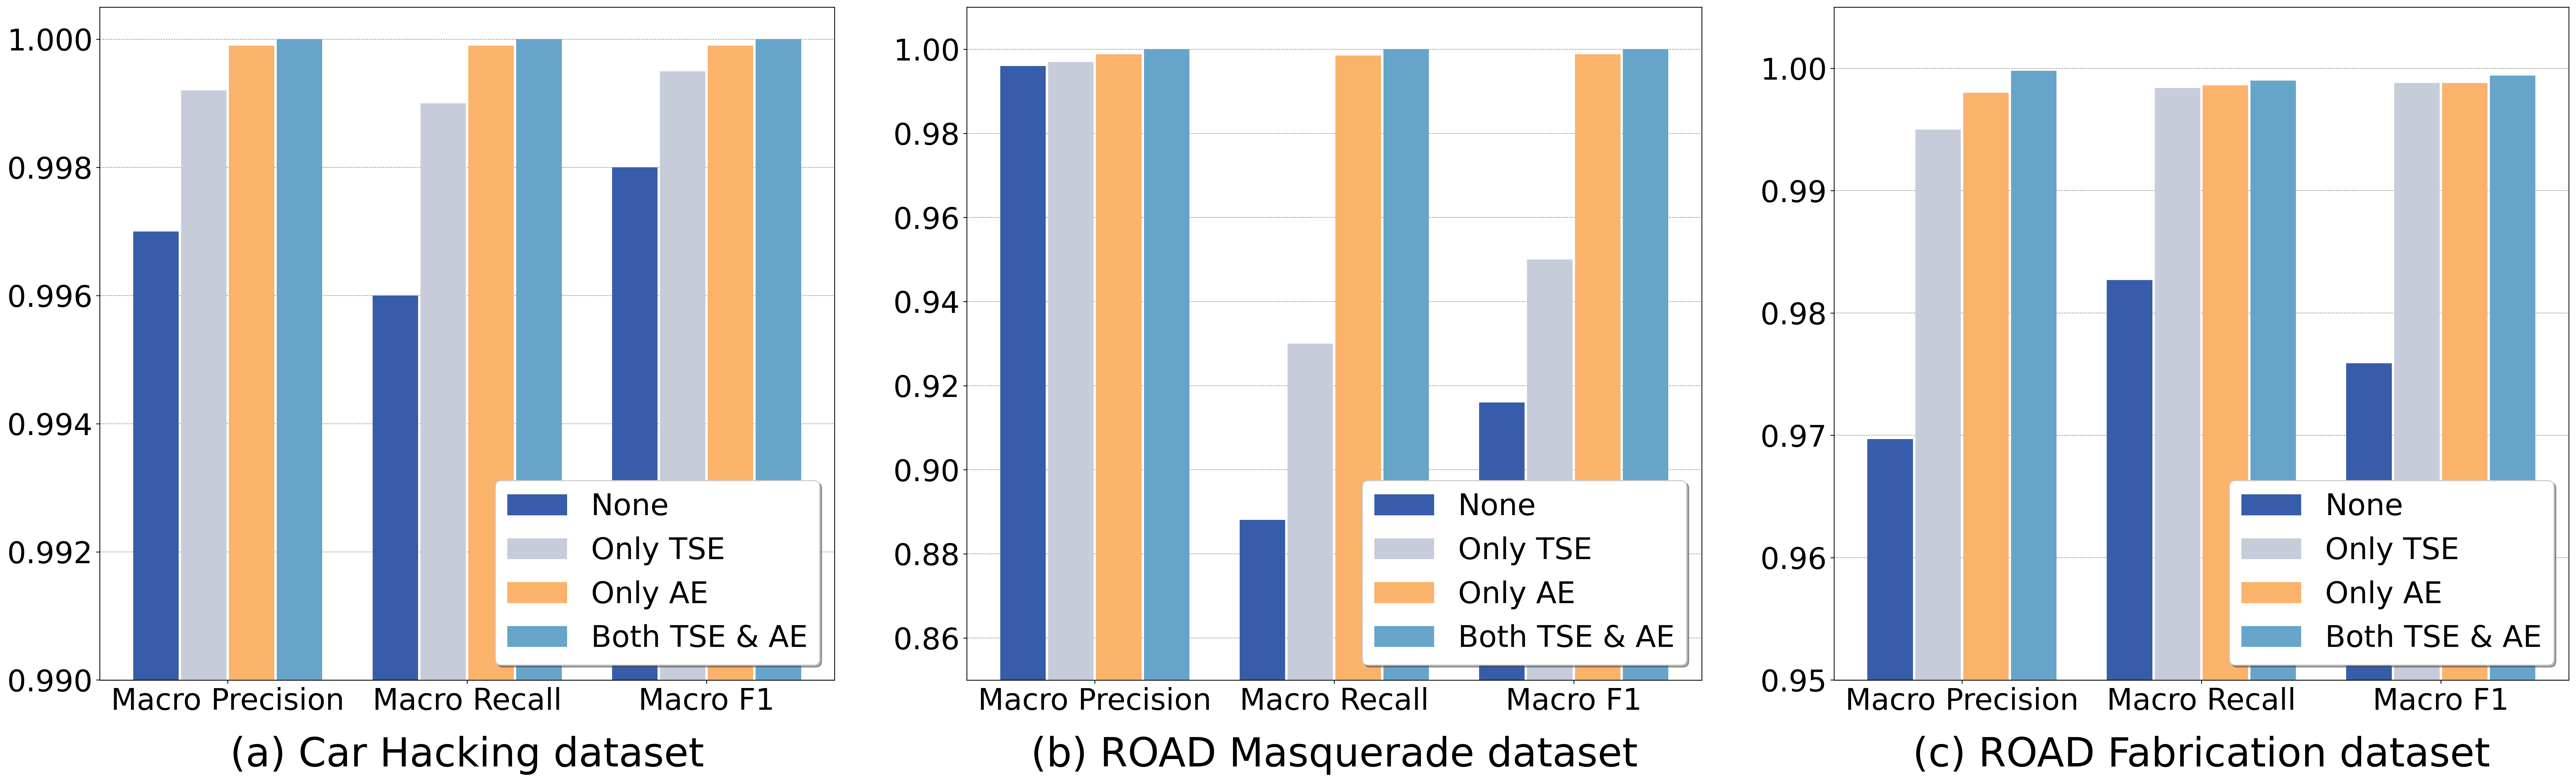

In [94]:
%matplotlib inline
attacks = ['None', 'Only TSE', 'Only AE', 'Both TSE & AE']
data_by_bs_2 = [
    {
    'Macro Precision': [ 0.997, 0.9992, 0.9999, 1.0 ],
    'Macro Recall': [ 0.996, 0.9990, 0.9999, 1.0 ],
    'Macro F1': [ 0.998, 0.9995, 0.9999, 1.0 ]
    },
    {
    'Macro Precision': [ 0.996, 0.997, 0.9988, 1.0 ],
    'Macro Recall': [ 0.8881, 0.93, 0.9985, 1.0 ],
    'Macro F1': [ 0.916, 0.95, 0.9988, 1.0 ]
    },
    {
    'Macro Precision': [ 0.9697, 0.995, 0.998, 0.9998 ],
    'Macro Recall': [ 0.9827, 0.9984, 0.9986, 0.9990 ],
    'Macro F1': [ 0.9759, 0.9988, 0.9988, 0.9994 ]
    },
]

data_res = []
for data in data_by_bs_2:
    data_by_attack = np.array([v for _, v in data.items()]).T
    data_by_attack = {k: v for k, v in zip(attacks, data_by_attack)}
    print(data_by_attack)
    data_res.append(data_by_attack)

xticks = ['Macro Precision', 'Macro Recall', 'Macro F1']
fig, axs = plot(xticks, data_res, ylim=[1.0005, 1.01, 1.005], figsize=(36, 11), bol=False)


axs[0].set_xlabel('(a) Car Hacking dataset', fontsize=40, labelpad=20)
axs[1].set_xlabel('(b) ROAD Masquerade dataset', fontsize=40, labelpad=20)
axs[2].set_xlabel('(c) ROAD Fabrication dataset', fontsize=40, labelpad=20)

plt.tight_layout()
# Add space between subplots
plt.subplots_adjust(wspace=0.18)    
# plt.savefig('../figures/hyperparams.png', dpi=300)

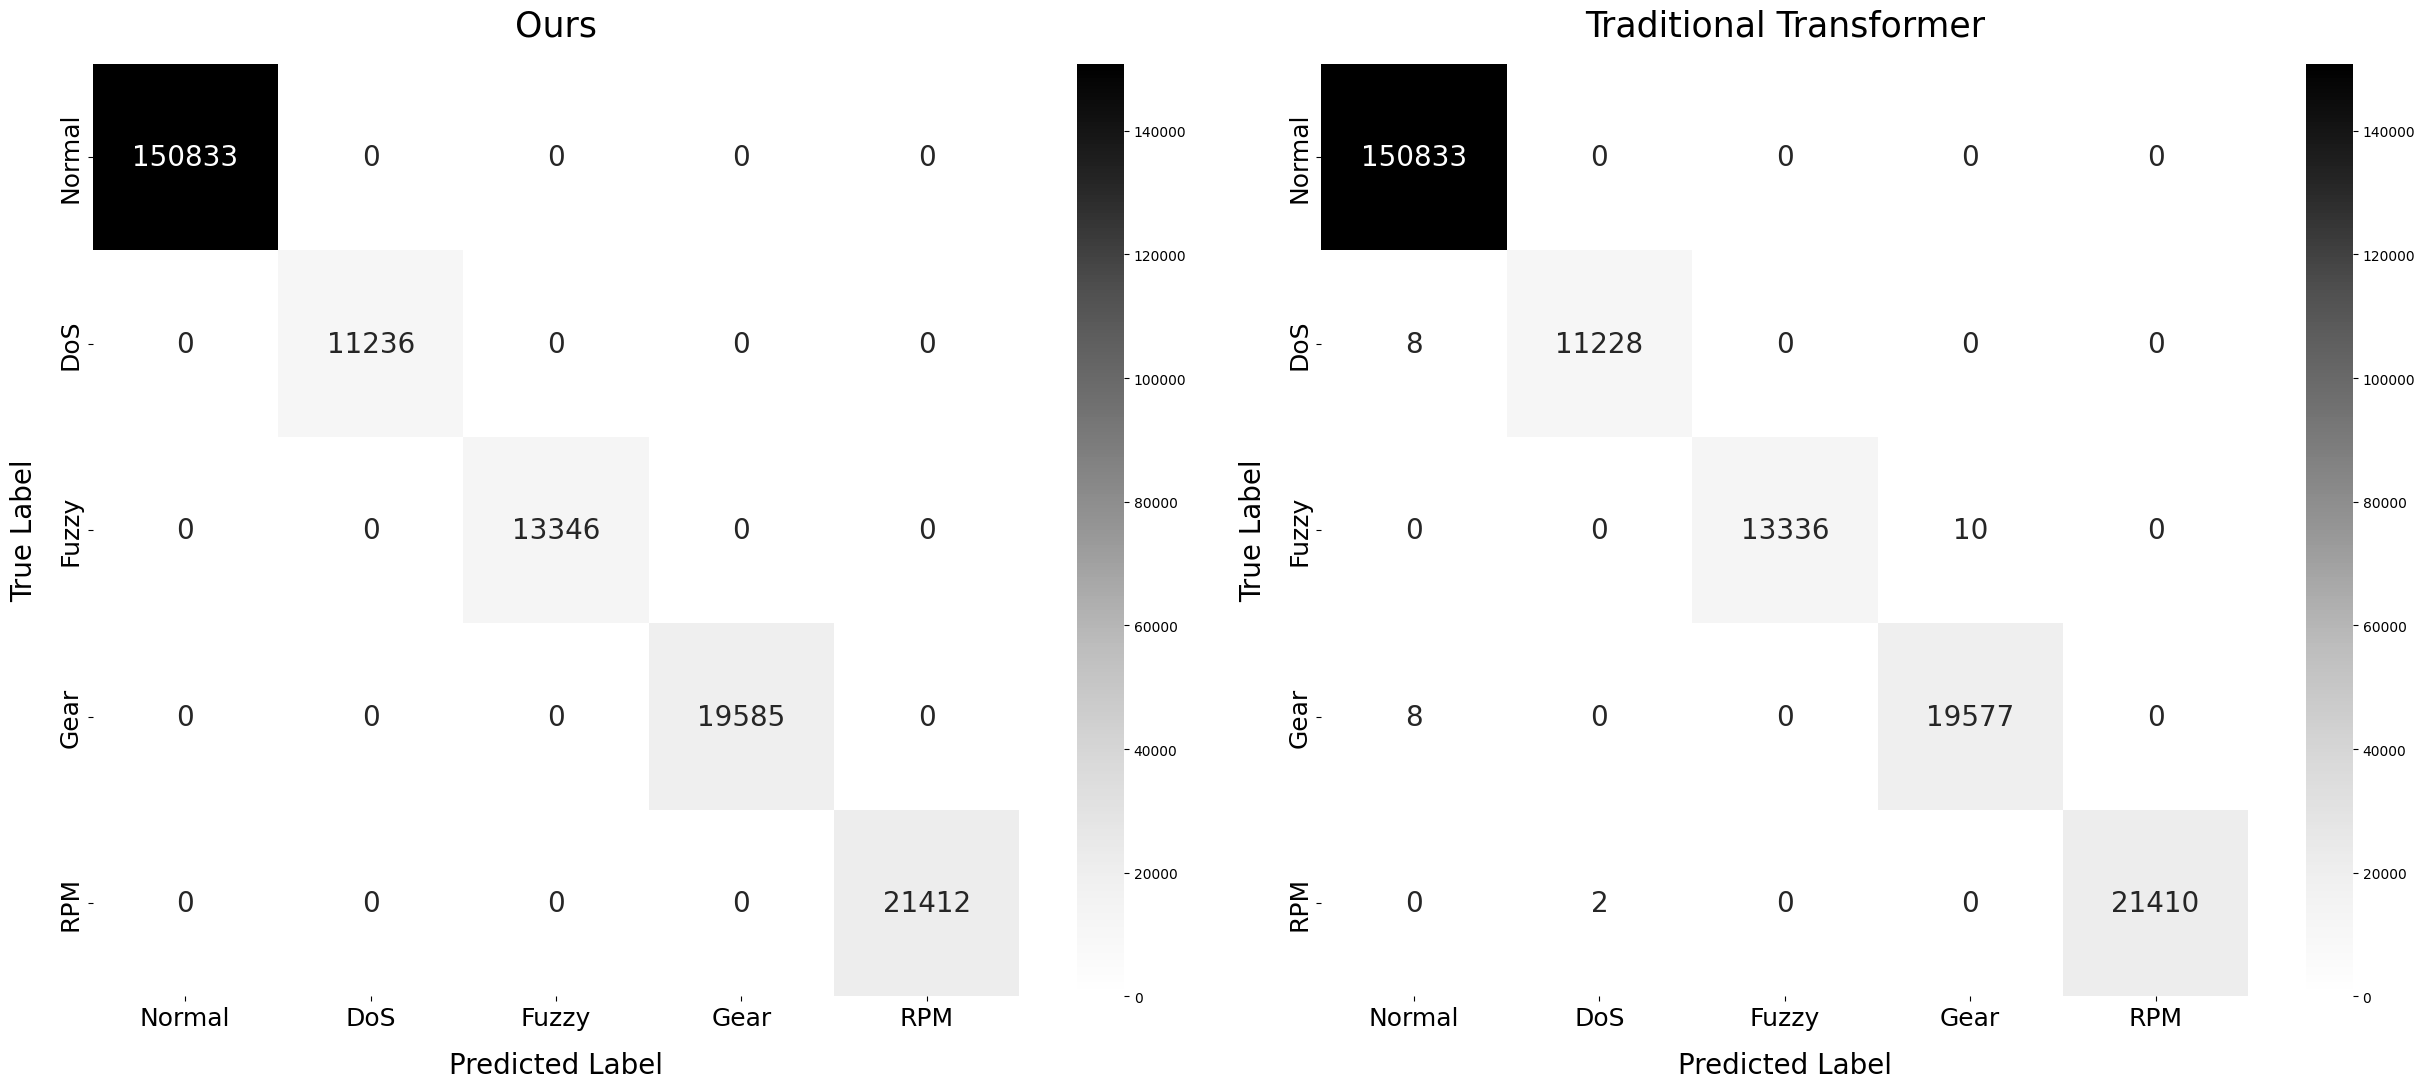

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data for confusion matrix
confusion_matrix_chd = np.array([[150833,      0,      0,      0,      0],
                             [     0,  11236,      0,      0,      0],
                             [     0,      0,  13346,      0,      0],
                             [     0,      0,      0,  19585,      0],
                             [     0,      0,      0,      0,  21412]])
confusion_matrix_chd1 = np.array([[150833,      0,      0,      0,      0],
                             [     8,  11228,      0,      0,      0],
                             [     0,      0,  13336,      10,      0],
                             [     8,      0,      0,  19577,      0],
                             [     0,      2,      0,      0,  21410]])

confusion_matrix_2 = np.array([
    [15110,0,0,1,0,0,0],
    [0,9,0,0,0,0,0],
    [0,0,12,0,0,0,0],
    [3,0,0,2285,0,0,0],
    [5,0,0,0,1686,0,0],
    [0,0,0,0,0,1071,0],
    [0,0,0,0,0,0,1006],
])

cm_mas = np.array([
    [15102,0,0,0,0,0],
    [0,9,0,0,0,0],
    [0,0,2250,0,0,0],
    [0,0,0,1587,0,0],
    [0,0,0,0,1051,0],
    [0,0,0,0,0,990]
])

# Labels for classes
labels = ["Normal", "DoS", "Fuzzy", "Gear", "RPM"]

labelss = ["Normal", "Attack"]
labelsss = ['Normal', 'MEC', 'Fuzzing', 'MS', 
              'RLOn', 'RLOff', 'CS']
labels_mas = ['Normal', 'MEC', 'MS', 
              'RLOn', 'RLOff', 'CS']
cm = np.array([[14394, 0],
               [0, 6448]])

fig, axs = plt.subplots(ncols=2, figsize=(25,11))

# sns.heatmap(cm_mas, annot=True, fmt="d", cmap="Greys", xticklabels=labels_mas, yticklabels=labels_mas, annot_kws={"size": 20}, ax=axs[0])
sns.heatmap(confusion_matrix_chd, annot=True, fmt="d", cmap="Greys", xticklabels=labels, yticklabels=labels, annot_kws={"size": 20}, ax=axs[0])
axs[0].tick_params(labelsize=18)
axs[0].set_ylabel('True Label', fontsize=20, labelpad=15)
axs[0].set_xlabel('Predicted Label', fontsize=20, labelpad=15)
# axs[0].set_title('Ours', fontsize=25, pad=20)
axs[0].set_title('(a) ROAD Masquerade attack', fontsize=25, pad=20)

# sns.heatmap(confusion_matrix_2, annot=True, fmt="d", cmap="Greys", xticklabels=labelsss, yticklabels=labelsss, annot_kws={"size": 20}, ax=axs[1])
sns.heatmap(confusion_matrix_chd1, annot=True, fmt="d", cmap="Greys", xticklabels=labels, yticklabels=labels, annot_kws={"size": 20}, ax=axs[1])
axs[1].tick_params(labelsize=18)
axs[1].set_ylabel('True Label', fontsize=20, labelpad=15)
axs[1].set_xlabel('Predicted Label', fontsize=20, labelpad=15)
# axs[1].set_title('Traditional Transformer', fontsize=25, pad=20)
axs[1].set_title('(b) ROAD Fabrication attack', fontsize=25, pad=20)

plt.tight_layout()
plt.show()


In [95]:
import numpy as np

# Confusion matrix
confusion_matrix_2 = np.array([
    [13715,2,0,2,0,0],
 [    6,3,0,0,0,0],
 [    0,0,2250,0,0,0],
 [    2,0,0,1585,0,0],
 [    0,0,0,0,1051,0],
 [    0,0,0,0,0,990],
])
confusion_matrix = np.array([
    [15110,0,0,1,0,0,0],
    [0,9,0,0,0,0,0],
    [0,0,12,0,0,0,0],
    [3,0,0,2285,0,0,0],
    [5,0,0,0,1686,0,0],
    [0,0,0,0,0,1071,0],
    [0,0,0,0,0,0,1006],
])

confusion_matrix_test = np.array([
    [15094,1,0,0,11,5,0],
    [0,9,0,0,0,0,0],
    [0,0,12,0,0,0,0],
    [7,0,0,2281,0,0,0],
    [17,0,0,0,1673,1,0],
    [0,0,0,0,0,1071,0],
    [0,0,0,0,0,0,1006],
])


# List of attributes
attributes = ['Normal', 'max_engine_coolant_temp_attack', 'fuzzing_attack', 'max_speedometer_attack', 
              'reverse_light_on_attack', 'reverse_light_off_attack', 'correlated_signal_attack']
attributes2 = ['Normal', 'max_engine_coolant_temp_attack', 'max_speedometer_attack', 
              'reverse_light_on_attack', 'reverse_light_off_attack', 'correlated_signal_attack']

# F1 score calculation for each attribute
f1_scores = []

for i in range(len(attributes)):
    TP = confusion_matrix[i, i]
    TN = sum(sum(confusion_matrix)) - TP
    FP = sum(confusion_matrix[:, i]) - TP
    FN = sum(confusion_matrix[i, :]) - TP
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * precision * recall / (precision + recall)
    FNR = (FN / (TP + FN))*100  # False Negative Rate
    FPR = (FP / (FP + TN))*100  # False Positive Rate
    print('Attribute: ', attributes[i])
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F1 score: ', f1_score)
    print('False Negative Rate: ', FNR)  # Print FNR
    print('False Positive Rate: ', FPR)  # Print FPR
    f1_scores.append(f1_score)

f1_scores_per_attribute = dict(zip(attributes, f1_scores))
f1_scores_per_attribute


Attribute:  Normal
Accuracy:  0.9995754116148512
Precision:  0.9994708294747983
Recall:  0.9999338230428165
F1 score:  0.9997022726520891
False Negative Rate:  0.006617695718350871
False Positive Rate:  0.13144922773578707
Attribute:  max_engine_coolant_temp_attack
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0
False Negative Rate:  0.0
False Positive Rate:  0.0
Attribute:  fuzzing_attack
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0
False Negative Rate:  0.0
False Positive Rate:  0.0
Attribute:  max_speedometer_attack
Accuracy:  0.9998112495281238
Precision:  0.9995625546806649
Recall:  0.9986888111888111
F1 score:  0.9991254919108001
False Negative Rate:  0.13111888111888112
False Positive Rate:  0.005289885738468049
Attribute:  reverse_light_on_attack
Accuracy:  0.9997640730429859
Precision:  1.0
Recall:  0.997043169722058
F1 score:  0.9985193959135328
False Negative Rate:  0.29568302779420463
False Positive Rate:  0.0
Attribute:  reverse_light_off_attack
Ac

{'Normal': 0.9997022726520891,
 'max_engine_coolant_temp_attack': 1.0,
 'fuzzing_attack': 1.0,
 'max_speedometer_attack': 0.9991254919108001,
 'reverse_light_on_attack': 0.9985193959135328,
 'reverse_light_off_attack': 1.0,
 'correlated_signal_attack': 1.0}